# Phase1: Model Building On Training Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step1: Read Data

In [32]:
train= pd.read_csv('./train_electronic.csv')
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [33]:
train.shape

(2326, 7)

In [34]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price'],
      dtype='object')

# Step2: Exploratory Data Analysis

Missing Data Analysis

In [35]:
train.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
Price                     0
dtype: int64

2.2 Data Type Analysis

In [36]:
train.dtypes

Brand                      int64
Model_Info                object
Additional_Description    object
Locality                   int64
City                       int64
State                      int64
Price                      int64
dtype: object

# 2.3 Univariate Analysis
At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots:

In [37]:
train.describe()

,Brand,Locality,City,State,Price
count,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,1.047291,538.894239,7.294067,3.693465,25562.137145
std,0.396109,333.355186,5.408113,2.194072,21316.854497
min,0.000000,0.000000,0.000000,0.000000,399.000000
25%,1.000000,249.000000,2.000000,2.000000,12000.000000
50%,1.000000,534.000000,8.000000,4.000000,18945.000000
75%,1.000000,814.000000,11.000000,5.000000,30974.250000
max,3.000000,1191.000000,17.000000,8.000000,129998.000000


2.3.1 Discrete Variables Plot

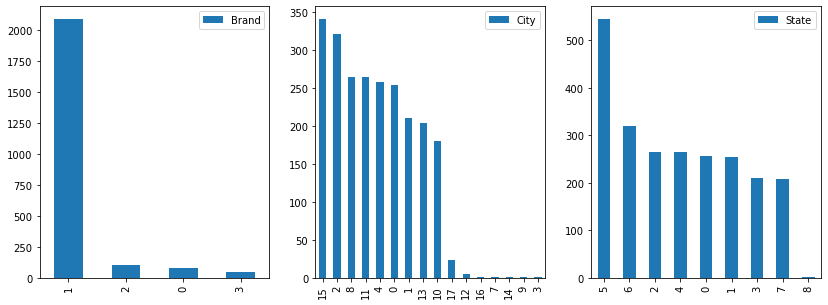

In [38]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
train.Brand.value_counts().plot(kind='bar',label='Brand')
plt.legend()

plt.subplot(1,3,2)
train.City.value_counts().plot(kind='bar',label='City')
plt.legend()

plt.subplot(1,3,3)
train.State.value_counts().plot(kind='bar',label='State')
plt.legend()

2.3.5 Target Variable Plot

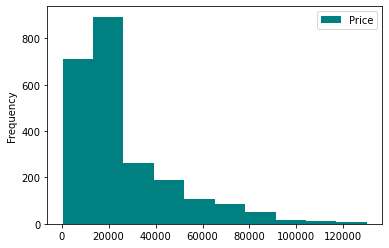

In [39]:
train.Price.plot(kind='hist',color=['teal'],label='Price')
plt.legend()

# Step3 : Feature Engineering

In [40]:
def device_memory_category(x):
    if (x.find("16gb") != -1) or (x.find("16 gb") != -1):
        return 1
    elif(x.find("32gb") != -1) or (x.find("32 gb") != -1):
        return 2
    elif(x.find("64gb") != -1) or (x.find("64 gb") != -1):
        return 3
    elif(x.find("128gb") != -1) or (x.find("128 gb") != -1):
        return 4
    elif(x.find("256gb") != -1) or (x.find("256 gb") != -1):
        return 1
    else:
        return 0
    
def if_iphopne_or_ipad(x):
    if (x.find("iphone") != -1) or (x.find("ipad") != -1):
        return 1
    else:
        return 0
    
def device_condition(x):
    if (x.find("good") != -1) or (x.find("great") != -1) or (x.find("excellent") != -1) or (x.find("new") != -1) \
    or (x.find("mint") != -1):
        return 1
    else:
        return 0
    
def under_warranty(x):
    if (x.find("billbox") != -1) or (x.find("warranty") != -1) or (x.find("boxbill") != -1) or (x.find("box") != -1) \
    or (x.find("bill box") != -1):
        return 1
    else:
        return 0

In [41]:
train["device_memory"] = train["Model_Info"].apply(lambda x: device_memory_category(x))
train["phone_status"] = train["Model_Info"].apply(lambda x: if_iphopne_or_ipad(x))
train["device_condition"] = train["Model_Info"].apply(lambda x: device_condition(x))
train["warranty_status"] = train["Additional_Description"].apply(lambda x: under_warranty(x))

In [42]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,device_memory,phone_status,device_condition,warranty_status
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,3,0,0,0
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,0,0,1,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,1,0,1,0
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,3,0,0,1
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,0,0,1,1


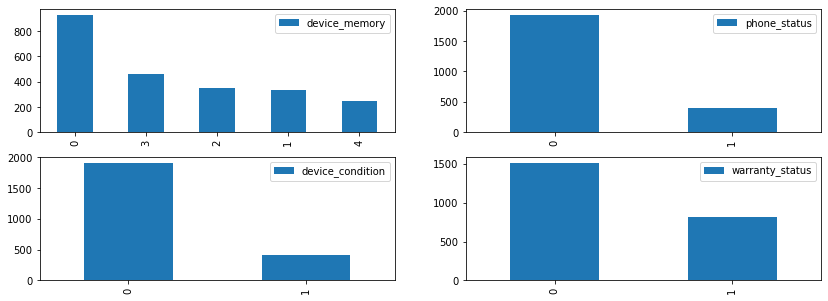

In [43]:
plt.figure(figsize=(14,5))

plt.subplot(2,2,1)
train.device_memory.value_counts().plot(kind='bar', label = 'device_memory')
plt.legend()

plt.subplot(2,2,2)
train.phone_status.value_counts().plot(kind='bar', label = 'phone_status')
plt.legend()

plt.subplot(2,2,3)
train.device_condition.value_counts().plot(kind='bar', label = 'device_condition')
plt.legend()

plt.subplot(2,2,4)
train.warranty_status.value_counts().plot(kind='bar', label = 'warranty_status')
plt.legend()

In [44]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,device_memory,phone_status,device_condition,warranty_status
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,3,0,0,0
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,0,0,1,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,1,0,1,0
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,3,0,0,1
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,0,0,1,1


In [45]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price', 'device_memory', 'phone_status', 'device_condition',
       'warranty_status'],
      dtype='object')

3.1 Dummy Variable Creation

In [46]:
train = pd.get_dummies(data=train, columns=['City','State','device_memory'], 
               prefix=['City', 'State', 'Device_memory'], drop_first=True)

In [47]:
train['City_5'] = 0
train['City_6'] = 0
train['City_18'] = 0 
train['City_19'] = 0

In [48]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'Price',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_7', 'City_8', 'City_9', 'City_10',
       'City_11', 'City_12', 'City_13', 'City_14', 'City_15', 'City_16',
       'City_17', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'Device_memory_1', 'Device_memory_2',
       'Device_memory_3', 'Device_memory_4', 'City_5', 'City_6', 'City_18',
       'City_19'],
      dtype='object')

In [49]:
train = train[['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'Price',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', 'City_10',
       'City_11', 'City_12', 'City_13', 'City_14', 'City_15', 'City_16',
       'City_17', 'City_18', 'City_19', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'Device_memory_1', 'Device_memory_2',
       'Device_memory_3', 'Device_memory_4']]

Step4: Separating X and Y

# 4.1 Re-setting Index Before Splitting

In [50]:
train.reset_index(drop=True,inplace=True)

# 4.2 Split Data

In [51]:
x = train.drop(['Price','Model_Info','Additional_Description'],axis=1)
y = train['Price']

In [52]:
x_copy = x.copy()

# Step5: Creating Train and Test Set In Ratio 80:20

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

# Step6: Model Building

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
import xgboost as xgb
import lightgbm as lgb

# 6.2 Importing and Model Fitting

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

6.2.1 Averaged base models class


In [61]:
#Define a cross validation strategy

#We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [62]:
#Base models

#LASSO Regression :
#This model may be very sensitive to outliers. So we need to made it more robust on them. 
#For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net Regression : again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression : With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [63]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [64]:
#Base models scores
#Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+11, tolerance: 6.942e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.813e+10, tolerance: 7.098e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+11, tolerance: 7.097e


Lasso score: 20163.6531 (730.4955)



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.829e+11, tolerance: 6.926e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.917e+11, tolerance: 6.923e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet score: 20163.0262 (727.2152)

Kernel Ridge score: 20003.7172 (718.0659)

Gradient Boosting score: 20072.8876 (716.8621)



In [65]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[23:41:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[23:41:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[23:41:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[23:41:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[23:41:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 20396.4720 (607.1205)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [

# Stacking models
Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class

In [66]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix

In [67]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.930e+11, tolerance: 6.942e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+11, tolerance: 6.942e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.967e+11, tolerance: 7.098e

 Averaged base models score: 19638.3095 (727.1600)



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+11, tolerance: 6.923e+07
  model = cd_fast.enet_coordinate_descent(


In [68]:
model = averaged_models.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.662e+11, tolerance: 8.747e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+11, tolerance: 8.747e+07
  model = cd_fast.enet_coordinate_descent(


In [69]:
mean_squared_error(predictions, y_test)

354506822.1344796

In [70]:
#On Full Data

model_full = averaged_models.fit(x, y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+11, tolerance: 1.056e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e+11, tolerance: 1.056e+08
  model = cd_fast.enet_coordinate_descent(


In [71]:
# Lightgbm on Full Data

lightgbm_full = model_lgb.fit(x, y)
# XGBoost on Full Data

model_xgb_full = model_xgb.fit(x, y)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[23:45:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



# Phase2: Applying Model On Test Data

In [72]:
test = pd.read_csv('./test_electronic.csv')

In [73]:
test.shape

(997, 6)

In [74]:
test.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,11,4
1,1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,8,2
2,1,name0 sx ios12 top letast model bill call,1010017300 delivery,60,13,5
3,1,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,15,5
4,1,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,2,6


In [75]:
test["device_memory"] = test["Model_Info"].apply(lambda x: device_memory_category(x))
test["phone_status"] = test["Model_Info"].apply(lambda x: if_iphopne_or_ipad(x))
test["device_condition"] = test["Model_Info"].apply(lambda x: device_condition(x))
test["warranty_status"] = test["Additional_Description"].apply(lambda x: under_warranty(x))

In [76]:
test = pd.get_dummies(data=test, columns=['City','State','device_memory'], 
               prefix=['City', 'State', 'Device_memory'], 
               drop_first=True)

In [77]:
test.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_4', 'City_5', 'City_6', 'City_8', 'City_10', 'City_11',
       'City_12', 'City_13', 'City_15', 'City_17', 'City_18', 'City_19',
       'State_1', 'State_2', 'State_3', 'State_4', 'State_5', 'State_6',
       'State_7', 'Device_memory_1', 'Device_memory_2', 'Device_memory_3',
       'Device_memory_4'],
      dtype='object')

In [78]:
test['City_3'] = 0
test['City_7'] = 0
test['City_9'] = 0
test['City_14'] = 0
test['City_16'] = 0
test['State_8'] = 0

In [79]:
test_for_prediction = test[['Brand', 'Locality',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', 'City_10',
       'City_11', 'City_12', 'City_13', 'City_14', 'City_15', 'City_16',
       'City_17', 'City_18', 'City_19', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'Device_memory_1', 'Device_memory_2',
       'Device_memory_3', 'Device_memory_4']]

In [80]:
test_for_prediction.head()

,Brand,Locality,phone_status,device_condition,warranty_status,City_1,City_2,City_3,City_4,City_5,...,State_3,State_4,State_5,State_6,State_7,State_8,Device_memory_1,Device_memory_2,Device_memory_3,Device_memory_4
0,1,570,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,762,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,60,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,640,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,816,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
def predict_file(model, model_instance, test_data):
    file_name = "Final_output_prediction_from_" + model + ".xlsx"
    predictions  = model_instance.predict(test_data)
    df_prediction_var = pd.DataFrame(predictions, columns=["Price"])
    df_prediction_var.to_excel(file_name)
    print("{} created.".format(file_name))

In [82]:
predict_file("stacked_model", model_full, test_for_prediction)

Final_output_prediction_from_stacked_model.xlsx created.


In [83]:
predict_file("lightgbm_model", lightgbm_full, test_for_prediction)

Final_output_prediction_from_lightgbm_model.xlsx created.


In [84]:
predict_file("xgboost_model", model_xgb_full, test_for_prediction)

Final_output_prediction_from_xgboost_model.xlsx created.


In [85]:
stacked_pred = model_full.predict(test_for_prediction.values)

xgb_pred = model_xgb_full.predict(test_for_prediction)

lgb_pred = lightgbm_full.predict(test_for_prediction.values)

ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [86]:
ensemble_sub = pd.DataFrame()
ensemble_sub['Price'] = ensemble
ensemble_sub.to_excel('ensemble_submission.xlsx',index=False)

In [87]:
file = pd.read_excel('./ensemble_submission.xlsx')

In [90]:
file.head()

,Price
0,17188.434781
1,23041.919702
2,27587.872036
3,30934.782690
4,22333.024792
